In [6]:
import os
import torch
from sklearn.metrics import confusion_matrix, accuracy_score
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

class CustomDataset(Dataset):
    def __init__(self, images, labels):
        self.images = images
        self.labels = labels

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]
        return torch.tensor(image, dtype=torch.float32), torch.tensor(label, dtype=int)

In [11]:
dataset_type = 'GaN'
Xname = 'X_GaNmul3_VSHS'
yname = 'y_GaN_new'
model_name = 'GaN-VSHS-L-K2S3-[480-480-480-R-9]-88-9697-2024_09_13_15_42_19.pth'

In [12]:
dir_path = './model/analyze'
model_path = os.path.join(dir_path, model_name)
model = torch.load(model_path).cuda()
model.eval()
images = np.load(f"./resource/{Xname}.npy")
labels = np.load(f"./resource/{yname}.npy")
sample_number = images.shape[0]
ratio = 0.8
images_train = images[:int(sample_number*ratio)]
images_test = images[int(sample_number*ratio):]
labels_train = labels[:int(sample_number*ratio)]
labels_test = labels[int(sample_number*ratio):]
dataset_train = CustomDataset(images_train, labels_train)
dataset_test = CustomDataset(images_test, labels_test)
test_loader = DataLoader(dataset_test, batch_size=100, shuffle=False, num_workers=0)

In [13]:
all_preds = []
all_targets = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.cuda()
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_targets.extend(labels.cpu().numpy())

Accuracy: 96.98%


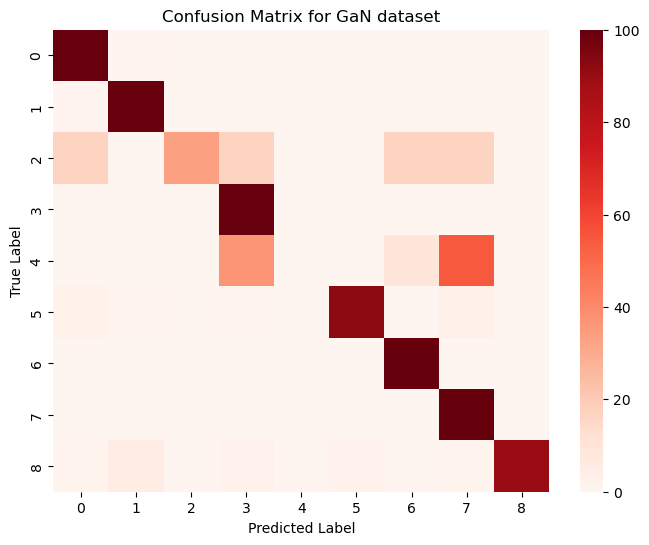

In [23]:
all_preds = []
all_targets = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.cuda()
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_targets.extend(labels.cpu().numpy())
        
accuracy = accuracy_score(all_targets, all_preds)
print(f'Accuracy: {accuracy * 100:.2f}%')
conf_matrix = confusion_matrix(all_targets, all_preds)
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100
# 创建一个热图来展示混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix,cmap='Reds')
plt.title(f'Confusion Matrix for {dataset_type} dataset')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [19]:
labels

tensor([1, 1, 7, 1, 0, 0, 7, 1, 5, 8, 0, 1, 7, 3, 3, 3, 7, 3, 3, 7, 5, 7, 3, 7,
        1, 3, 1, 5, 0, 8, 5, 0, 5, 0, 7, 1, 0, 0, 5, 1, 0, 3, 0, 8, 5, 5, 0, 5,
        5, 7, 1, 7, 0, 1])

In [22]:
conf_matrix

array([[539,   4,   0,   0,   0,   0,   0,   0,   0],
       [  2, 302,   0,   0,   0,   0,   0,   0,   0],
       [  1,   0,   2,   1,   0,   0,   1,   1,   0],
       [  0,   1,   0, 407,   0,   1,   0,   0,   0],
       [  0,   0,   0,   4,   0,   0,   1,   6,   0],
       [  6,   3,   0,   4,   0, 256,   0,   8,   0],
       [  0,   0,   0,   0,   0,   0,   7,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 179,   0],
       [  1,   6,   0,   2,   0,   2,   0,   1, 106]], dtype=int64)

{tensor(0),
 tensor(0),
 tensor(0),
 tensor(0),
 tensor(0),
 tensor(0),
 tensor(0),
 tensor(0),
 tensor(0),
 tensor(0),
 tensor(0),
 tensor(0),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(3),
 tensor(3),
 tensor(3),
 tensor(3),
 tensor(3),
 tensor(3),
 tensor(3),
 tensor(3),
 tensor(5),
 tensor(5),
 tensor(5),
 tensor(5),
 tensor(5),
 tensor(5),
 tensor(5),
 tensor(5),
 tensor(5),
 tensor(5),
 tensor(7),
 tensor(7),
 tensor(7),
 tensor(7),
 tensor(7),
 tensor(7),
 tensor(7),
 tensor(7),
 tensor(7),
 tensor(7),
 tensor(8),
 tensor(8),
 tensor(8)}

In [25]:
L =  np.load(f"./resource/{yname}.npy")

In [27]:
set(L)

{0, 1, 2, 3, 4, 5, 6, 7, 8}